<a href="https://colab.research.google.com/github/vbwanere/py_m_Projects/blob/Main_Penn/ML/Clustering/GMM_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **K-Means Clustering and Gaussian Mixture Models**
- **Reference:**
<ul>
<li>https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
<li>https://medium.com/swlh/gaussian-mixture-models-gmm-1327a2a62a
</ul>


- **Objectives:** The objective of this notebook is to walk through a working example of K-means clustering algorithm. In doing so, we will see how the algorithm will change from changing hyper-parameters. We can also observe K-means' shortcomings and how more generalized approaches (GMM) may lead to performance benefits.

# 1\. K-Means Clustering:

## 1\. Toy Dataset:

In [175]:
import random
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
import numpy as np
from sklearn.datasets import make_blobs

In [176]:
X, y = make_blobs(
   n_samples=1600, n_features=2,
   centers=4, cluster_std=0.8,
   shuffle=True, random_state=53
)

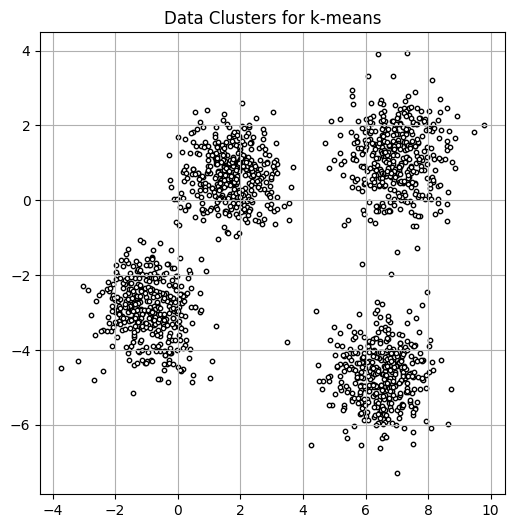

In [177]:
plt.figure(figsize=(6, 6))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='.',
   edgecolor='black', s=40
)
plt.title('Data Clusters for k-means')
plt.grid()
plt.show()

## 2\. `sklearn.cluster.KMeans`

In [178]:
from sklearn.cluster import KMeans

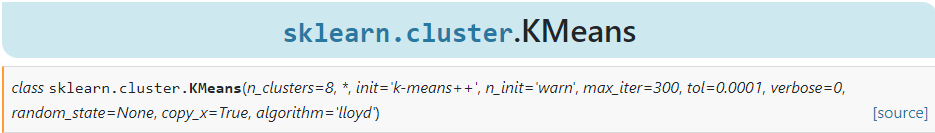

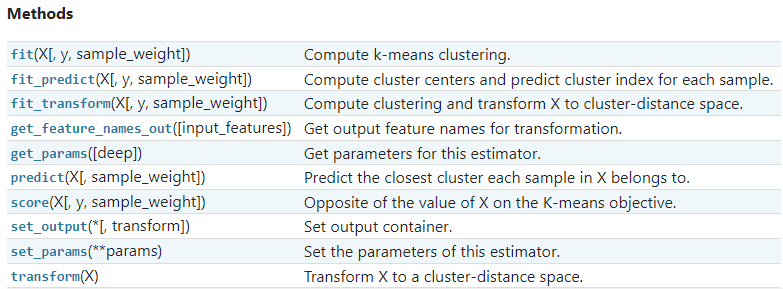

## 3\. Inerita-Elbow:

In [180]:
# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

distortions = []

for num_clusters in range(1, 20):
    kmeans = KMeans(
        n_clusters=num_clusters, init='random',
        n_init=n_runs, max_iter=max_iter,
        tol=1e-04, random_state=0
    )

    kmeans = kmeans.fit(X)
    distortions.append(kmeans.inertia_)


Text(0.5, 0, 'k parameter')

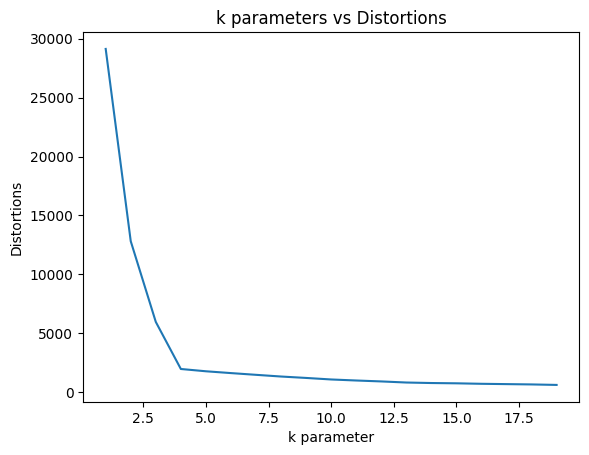

In [181]:
plt.plot(np.arange(1, 20, 1), distortions)
plt.title("k parameters vs Distortions")
plt.ylabel("Distortions")
plt.xlabel("k parameter")

## 4\. Algorithm and Predictions:

In [182]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
    )

y_pred_km = kmeans.fit_predict(X)

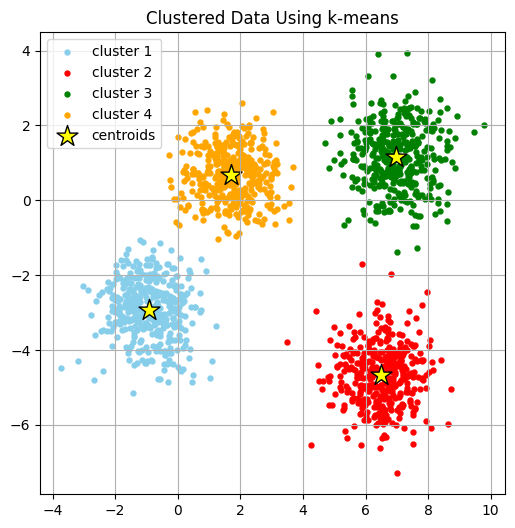

In [183]:
plt.figure(figsize=(6, 6))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='.', label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='.', label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='.', label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='orange', marker='.',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# 2\. Gaussian Mixture Model:

## 2.1\. Introduction:
### Understanding the distributions and their relationship:

Marginal Density of $\mathbf{X}$:

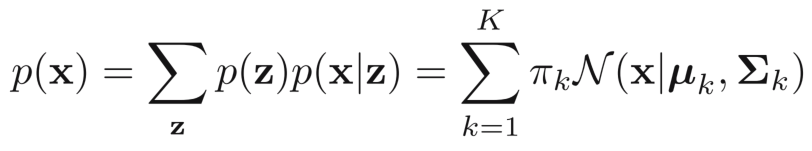

What is $\mathbf{z}$?\
$\mathbf{z}$ is the K-dimensional (This K is nothing but the number of clusters we want our dataset\
be divided into.) binary random variable having a 1-of-K representation in which a particular\
element $z_{k}$ is equal to 1 and all other elements are equal to 0.\
i.e. $z = [z_1, z_2,....,z_K]$, thus in the example $z = [0, 1,....,0]$, $z=1$ at $k=2$,\
thus $z_2 = 1$. ($k = 1,2,...,K$)

Now, what is $π_k$?:\
$p(z_k=1) =π_k$ such that:\
$0\le \pi_k \le 1$\
and\
$\sum_{k=1}^{K}\pi_k = 1$


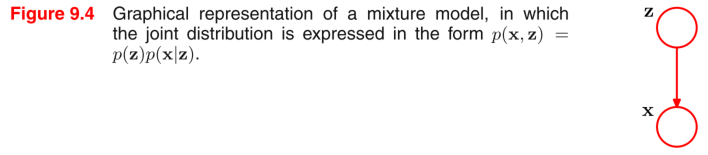

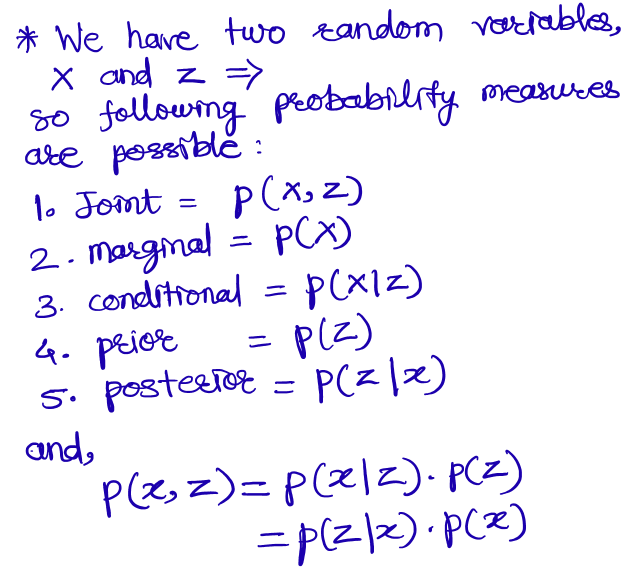

Let's see:
1. Conditional:

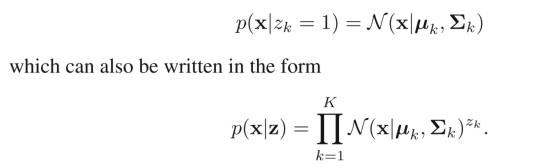


2. Prior:

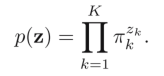

3. Posterior:

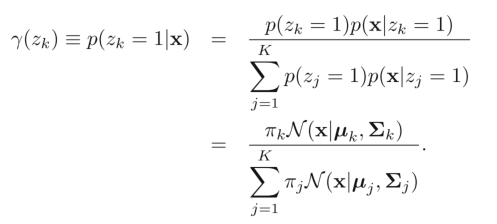

## 2.2\. Expectation Maximization Algorithm:

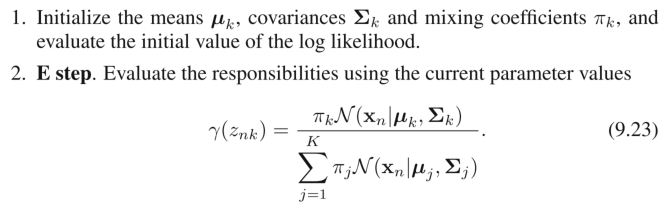

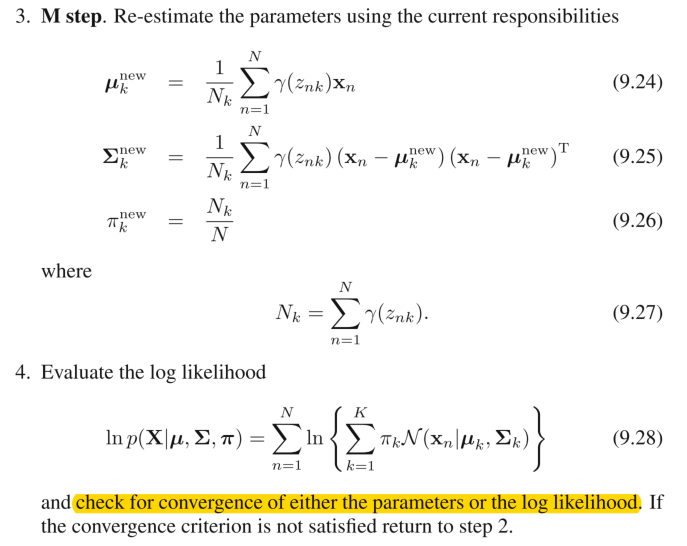

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

## 2.3\. Using `sklearn.mixture.GaussianMixture`:

In [185]:
transformation = [[0.6, -0.1],
                  [-0.6, 0.4]]
X, y = make_blobs(
    n_samples=1600, n_features=2,
    centers=4, cluster_std=1,
    shuffle=True, random_state=3)
X = np.dot(X, transformation)  # Anisotropic blobs

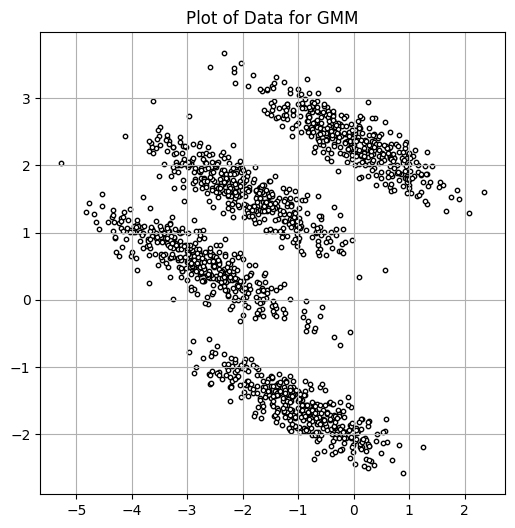

In [186]:
plt.figure(figsize=(6, 6))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='.',
   edgecolor='black', s=40
)
plt.title('Plot of Data for GMM')
plt.grid()
plt.show()

In [187]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

# Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

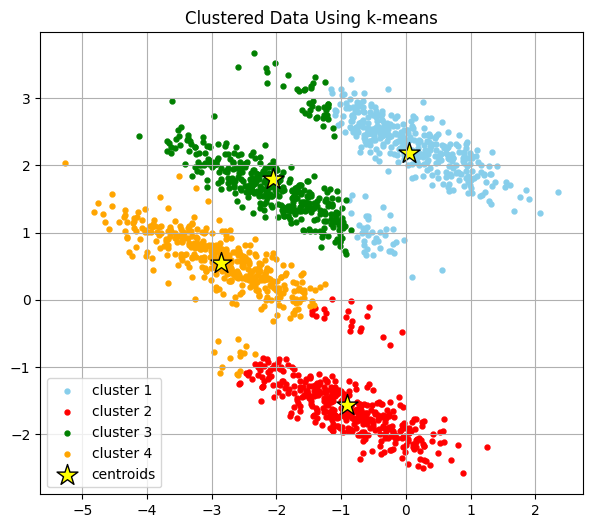

In [188]:
plt.figure(figsize=(7, 6))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='.', label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='.', label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='.', label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='orange', marker='.',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [189]:
from sklearn.mixture import GaussianMixture

In [195]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

# Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive.
n_runs = 10

GMM = GaussianMixture(
    n_components=num_clusters,
    n_init=n_runs, max_iter=max_iter,
    tol=1e-04, random_state=0
)

y_pred_gmm = GMM.fit_predict(X)

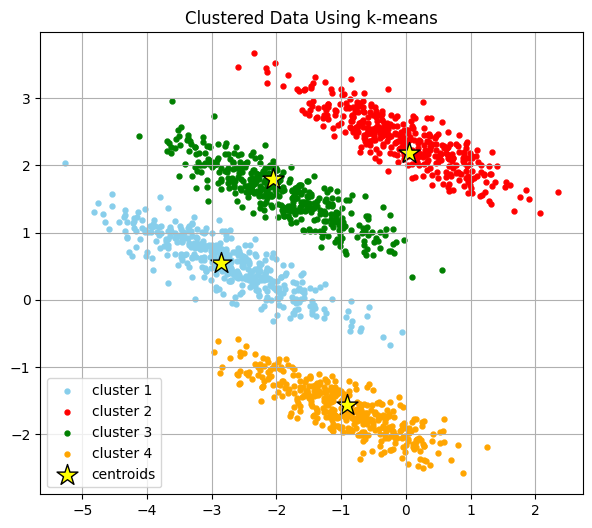

In [196]:
plt.figure(figsize=(7, 6))

# plot cluster 1
plt.scatter(
    X[y_pred_gmm == 0, 0], X[y_pred_gmm == 0, 1],
    s=50, c='skyblue',
    marker='.', label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_gmm == 1, 0], X[y_pred_gmm == 1, 1],
    s=50, c='red',
    marker='.', label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_gmm == 2, 0], X[y_pred_gmm == 2, 1],
    s=50, c='green',
    marker='.', label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_gmm == 3, 0], X[y_pred_gmm == 3, 1],
    s=50, c='orange', marker='.',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 4\. From Scratch: `GMM Class`:

In [205]:
import numpy as np
from scipy.stats import multivariate_normal

In [231]:
class GMM:

    def __init__(self, k, max_iter=5):
        self.k = k # number of distributions
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape # shape of the input (m, n)
        self.m, self.n = self.shape

        # Initializing the mean and covariance:
        # generate row index using m.
        random_row = np.random.randint(low=0, high=self.m, size=self.k)
        # use the above random rows to initialize the mean and covariance.
        # mean: shape = (n, 1)
        self.mu = [X[row_index, :] for row_index in random_row]
        # covariance: shape = (n, n)
        self.sigma = [np.cov(X, rowvar=False) for _ in range(self.k)]

        # mixing coefficient: shape = (1, k)
        self.pi = np.full((self.k, 1), 1/self.k).T
        # responsibility matrix: shape = (m, k)
        self.responsibility_k = np.full((self.m, self.k),\
                                             fill_value=1/self.k)


    def e_step(self, X):
        self.responsibility_k = self.responsibility_matrix(X)

    def m_step(self, X):
        self.pi = self.responsibility_k.mean(axis=0)
        for i in range(self.k):
            responsibility_k = self.responsibility_k[:, [i]] #(m, 1)
            sum_responsibility_k = responsibility_k.sum()

            self.mu[i] = ((responsibility_k * X).sum(axis=0) /\
                          sum_responsibility_k)

            self.sigma[i] = np.cov(X, rowvar=False,\
                                   aweights=(responsibility_k/\
                                             sum_responsibility_k).flatten(),\
                                   bias=True)

    def fit(self, X):
        self.initialize(X)

        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)

    def responsibility_matrix(self, X): # shape = (m, k)
        likelihood = np.zeros((self.m, self.k))
        for i in range(self.k):
            likelihood[:, i] = multivariate_normal.pdf(X, mean=self.mu[i],\
                                               cov=self.sigma[i])
            numerator = self.pi * likelihood # column-wise product
            denominator = numerator.sum(axis=1) # row-wise sum
            denominator = np.expand_dims(denominator, axis=1) # shape (m, 1)
            responsibility_matrix = numerator / denominator
        return responsibility_matrix

    def predict(self, X):
        responsibility_k = self.responsibility_matrix(X)
        return np.argmax(responsibility_k, axis=1)


In [242]:
my_gmm = GMM(k=4, max_iter=20)
my_gmm.fit(X)

y_pred_my_gmm = my_gmm.predict(X)

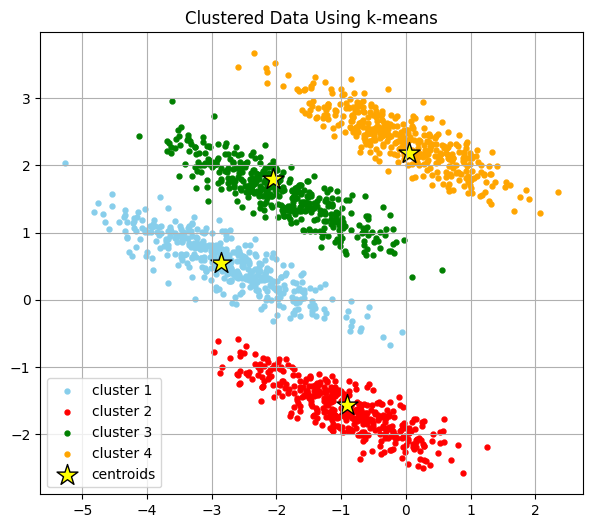

In [243]:
plt.figure(figsize=(7, 6))

# plot cluster 1
plt.scatter(
    X[y_pred_my_gmm == 0, 0], X[y_pred_my_gmm == 0, 1],
    s=50, c='skyblue',
    marker='.', label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_my_gmm == 1, 0], X[y_pred_my_gmm == 1, 1],
    s=50, c='red',
    marker='.', label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_my_gmm == 2, 0], X[y_pred_my_gmm == 2, 1],
    s=50, c='green',
    marker='.', label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_my_gmm == 3, 0], X[y_pred_my_gmm == 3, 1],
    s=50, c='orange', marker='.',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()